In [1]:
import os
import mne
import pandas as pd
import numpy as np

data_path = "/home/arthur/nvme/eventclf/"
np_files = os.path.join(data_path, "downsampled_500")

csv_path = data_path
with open(os.path.join(csv_path, "participants_info.csv"), "r") as f:
    df = pd.read_csv(f)

all_vis = np.zeros((3, 102, 400))
all_aud = np.zeros((3, 102, 400))
sub_files = os.listdir(np_files)

sub_count = 0
for sub_file in sub_files:
    sub = sub_file.split("_")[0]
    data = np.load(os.path.join(np_files, sub_file))
            
    stripped = ["\"", "'", "[" , "]"]
    labels = list(df[df['sub'] == sub]['label'])[0].split(", ")
    labels = np.array(["".join(filter(lambda c: c not in stripped, lab)) for lab in labels])
    if len(labels) != len(data):
        continue
        
    aud_index = np.where(labels == "auditory")
    all_aud += data[aud_index].mean(axis=0)
    vis_index = np.where(labels == "visual")
    all_vis += data[vis_index].mean(axis=0)
    sub_count += 1

all_aud /= sub_count
all_vis /= sub_count

auditory stimulus
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


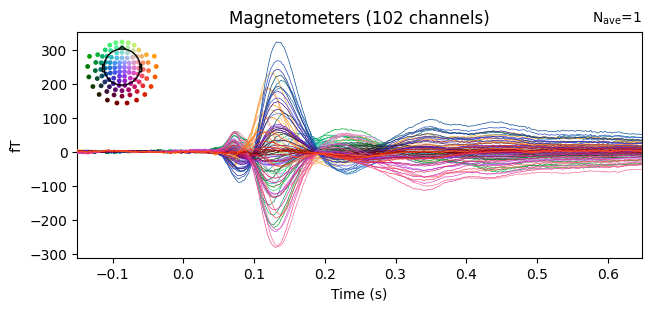

No projector specified for this dataset. Please consider the method self.add_proj.


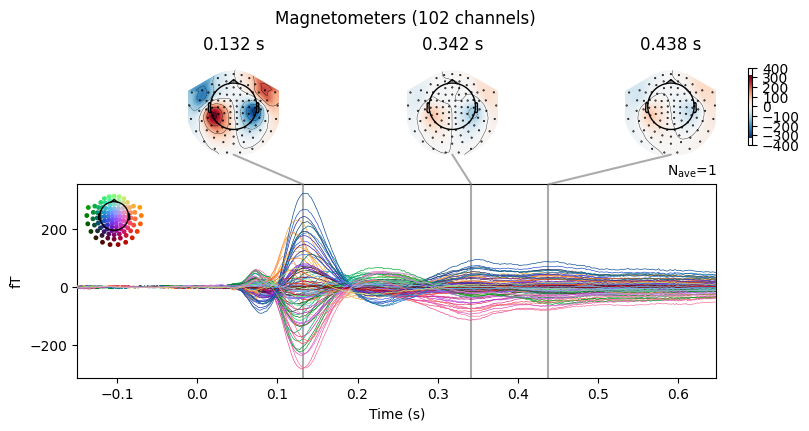

Figure(800x420)
visual stimulus
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


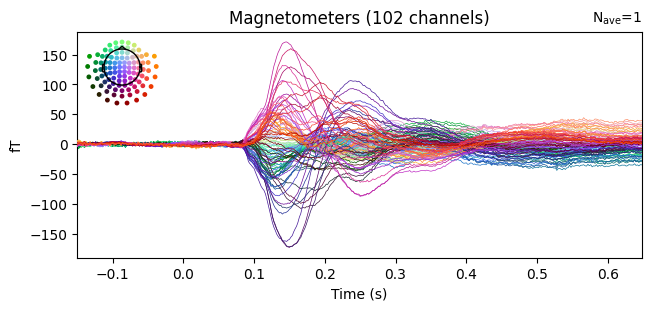

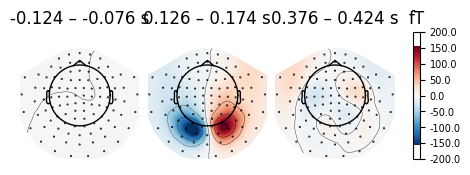

No projector specified for this dataset. Please consider the method self.add_proj.


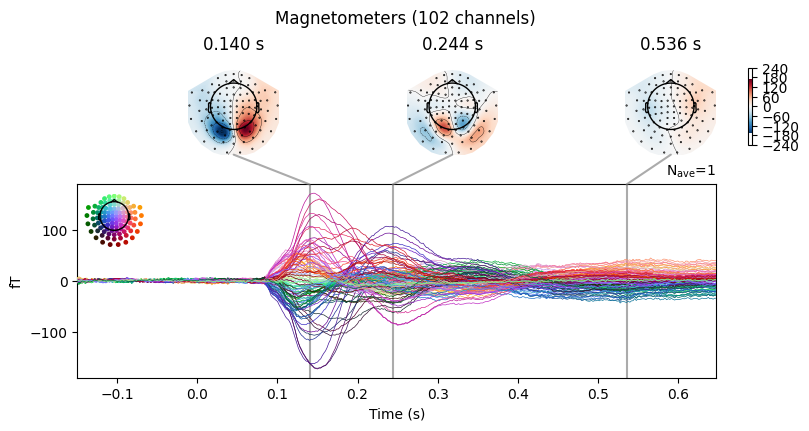

In [2]:
# for i, ch_type in enumerate(("mag", "grad")):
i = 0
ch_type = "mag"

info = np.load(f"../camcan_info_{ch_type}.npy", allow_pickle=True).tolist()

if ch_type == "grad":
    aud = np.zeros((1, 204, 400))
    vis = np.zeros((1, 204, 400))
    for channel in range(102):
        aud[0, channel * 2] = all_aud[1, channel] # planar1
        aud[0, channel * 2 + 1] = all_aud[2, channel]  # planar2
        vis[0, channel * 2] = all_vis[1, channel] # planar1
        vis[0, channel * 2 + 1] = all_vis[2, channel]  # planar2
else:
    aud = all_aud[i][np.newaxis]
    vis = all_vis[i][np.newaxis]

print("auditory stimulus")
aud_epoch = mne.EpochsArray(aud, info, tmin=-.15)
l_aud = aud_epoch.average()
fig = l_aud.plot(spatial_colors=True);
# fig = l_aud.plot_topomap(times=[-0.1, 0.15, 0.4], average=0.05);
fig = l_aud.plot_joint();
print(fig)
fig.savefig(f"{ch_type}_ERP_auditory.png", dpi=300)

print("visual stimulus")
vis_epoch = mne.EpochsArray(vis, info, tmin=-.15)
l_vis = vis_epoch.average()
fig = l_vis.plot(spatial_colors=True);
fig = l_vis.plot_topomap(times=[-0.1, 0.15, 0.4], average=0.05);
fig = l_vis.plot_joint();
fig.savefig(f"{ch_type}_ERP_visual.png", dpi=300)


auditory stimulus
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


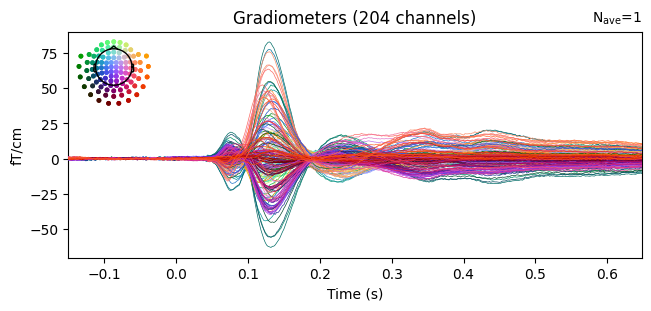

No projector specified for this dataset. Please consider the method self.add_proj.


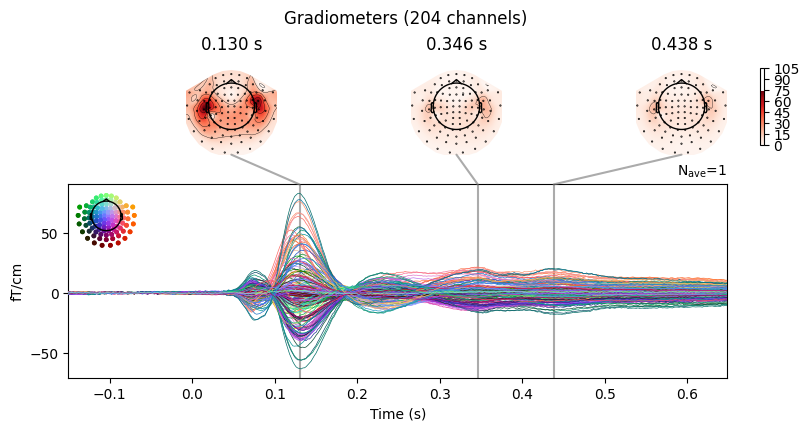

Figure(800x420)
visual stimulus
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


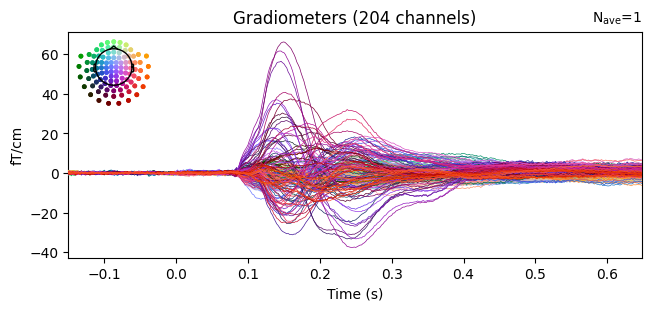

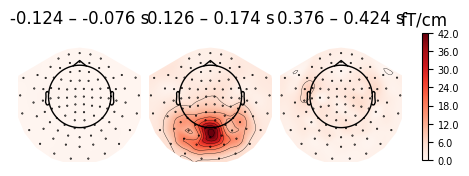

No projector specified for this dataset. Please consider the method self.add_proj.


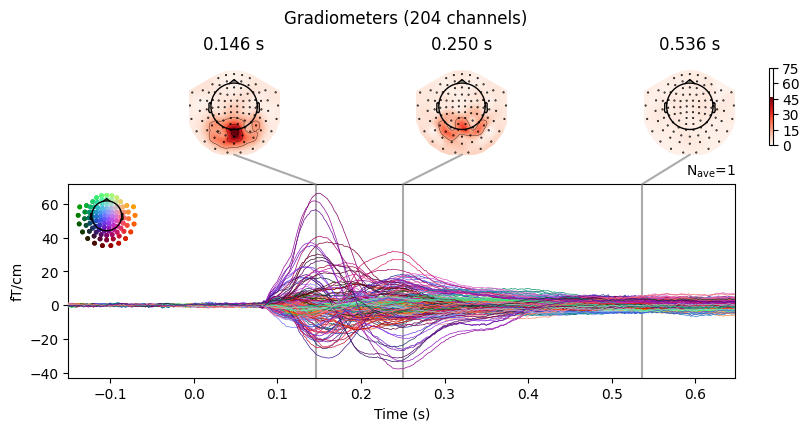

In [3]:
# for i, ch_type in enumerate(("mag", "grad")):
i = 0
ch_type = "grad"

info = np.load(f"../camcan_info_{ch_type}.npy", allow_pickle=True).tolist()

if ch_type == "grad":
    aud = np.zeros((1, 204, 400))
    vis = np.zeros((1, 204, 400))
    for channel in range(102):
        aud[0, channel * 2] = all_aud[1, channel] # planar1
        aud[0, channel * 2 + 1] = all_aud[2, channel]  # planar2
        vis[0, channel * 2] = all_vis[1, channel] # planar1
        vis[0, channel * 2 + 1] = all_vis[2, channel]  # planar2
else:
    aud = all_aud[i][np.newaxis]
    vis = all_vis[i][np.newaxis]

print("auditory stimulus")
aud_epoch = mne.EpochsArray(aud, info, tmin=-.15)
l_aud = aud_epoch.average()
fig = l_aud.plot(spatial_colors=True);
# fig = l_aud.plot_topomap(times=[-0.1, 0.15, 0.4], average=0.05);
fig = l_aud.plot_joint();
print(fig)
fig.savefig(f"{ch_type}_ERP_auditory.png", dpi=300)

print("visual stimulus")
vis_epoch = mne.EpochsArray(vis, info, tmin=-.15)
l_vis = vis_epoch.average()
fig = l_vis.plot(spatial_colors=True);
fig = l_vis.plot_topomap(times=[-0.1, 0.15, 0.4], average=0.05);
fig = l_vis.plot_joint();
fig.savefig(f"{ch_type}_ERP_visual.png", dpi=300)
